In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
df = pd.read_csv("NMvW_data/v0.csv.gz", 
                 dtype=dict(Provenance="string", RelatedWorks="string"))

# TODO: save & load DF s.t. these lines are not necessary here                
df["ObjectID"] = df.ObjectID.astype("int")
df = df.set_index("ObjectID")

In [ ]:
df2 = df[(df.BeginISODate+df.EndISODate) > 0]

df2.apply(lambda r: len(str(r.Title) + str(r.Description)) > 6, axis="columns").sum()/df2.shape[0]

In [ ]:
type(df2.iloc[0].Description)

In [ ]:

import spacy
from nltk import Tree

nlp = spacy.load("nl_core_news_sm")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_
    
doc = nlp(df.Description.dropna().iloc[0])
print(doc)
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

In [ ]:
from spacy import displacy
displacy.render(doc, style='dep')

In [ ]:
[nlp(t) for t in tqdm(df.Description) if isinstance(t, str)]

---
# Search

In [ ]:
kws = "" # "hello, goodbye"
prep_kws = "|".join(kws.lower().replace(", ", ",").split(","))
        
if (not kws.strip()) or (not prep_kws):
    does_contain = [True]*df.shape[0]
else:
    print("what")
    
print(does_contain)

In [ ]:
from urllib.parse import unquote

unquote('"objectKeywords"%3A""%2C"objectStartDate"%3A""%2C"objectEndDate"')

---
# Dates

 1. make all dates at least 1 (because python cannot deal with years <= 0)  
    (or drop non-positive dates)  
    (drop objects with EndISODate <= 0 in any case (doesn't make any sense))  
 
 2. convert all year values to %Y-%m-%d format (expected by Werner's API)  
    (by using datetime.strptime; allows comparison with > )  

In [ ]:
from datetime import datetime
frmt = "%Y-%m-%d"
start_year, end_year = datetime.strptime("2011-02-01", frmt), datetime.strptime("2013-10-02", frmt)

In [ ]:
(start_year.year > df.BeginISODate).sum()

In [ ]:
df.BeginISODate[(df.BeginISODate > 1500)].hist(bins=100)

### 1.

In [ ]:
df = df[df.EndISODate > 0]

# drop
df = df[df.BeginISODate > 0]

# change
df["BeginISODate"] = df.BeginISODate.replace(0, 1)

### 2.

In [ ]:
df["start_date"] = df.BeginISODate.astype(str).str.zfill(4).apply(lambda s: dt.strptime(s, "%Y"))
df["end_date"] = df.EndISODate.astype(str).str.zfill(4).apply(lambda s: dt.strptime(s, "%Y"))

---
# Fixing Strange x-Axis Data Issue 

In [ ]:
https://sabio.diginfra.nl/api/v1/objects/<datasetID>/search/%7B%22objectKeywords%22%3A%22hengelo%22%2C%22objectStartDate%22%3A%22%22%2C%22objectEndDate%22%3A%22%22%2C%22objectParams%22%3A[%7B%22id%22%3A%22Classification%22%2C%22value%22%3A%22%22%7D%2C%7B%22id%22%3A%22Department%22%2C%22value%22%3A%22%22%7D]%2C%22engineId%22%3A%22RandomEnginev0%22%2C%22engineMinScore%22%3A0%2C%22engineMaxScore%22%3A1%2C%22engineParams%22%3A[%7B%22id%22%3A0%2C%22value%22%3A%22useless1%22%7D]%2C%22vocabularyTerms%22%3A%22bewindhebber%2Cbewindvoerder%2Cbomba%2Cbombay%2Ccimarron%2Cderde%20wereld%2Cdwerg%2Cexpeditie%2Cgouverneur%2Chalfbloed%2Chottentot%2Cinboorling%2Cindiaan%2Cindisch%2Cindo%2Cinheems%2Cinlander%2Cjap%2Cjappen%2Cjappenkampen%2Ckaffer%2Ckaffir%2Ckafir%2Ckoelie%2Ckolonie%2Clagelonenland%2Clandhuis%2Cmarron%2Cmarronage%2Cmissie%2Cmissionaris%2Cmoor%2Cmoors%2Cmoren%2Cmulat%2Coctroon%2Contdekken%2Contdekking%2Contdekkingsreis%2Contwikkelingsland%2Coorspronkelijk%2Coosters%2Copperhoofd%2Cori%C3%ABntaals%2Cpinda%2Cpolitionele%20actie%2Cprimitief%2Cprimitieven%2Cpygmee%2Cras%2Crasch%2Cslaaf%2Cstam%2Cstamhoofd%2Ctraditioneel%2Ctropisch%2Cwesters%2Cwilden%2Czendeling%2Czendelingen%2Czending%22%7D/scatterplot/1/405100?api=https%3A%2F%2Fsabio.diginfra.net%2Fapi%2Fv1%2F

In [ ]:
https://sabio.diginfra.nl/api/v1/engines

In [ ]:
https://sabio.diginfra.net/api/v1/objects/NMvW_v0/search?object_keywords=hengelo&object_start_date=&object_end_date=&engine_id=RandomEnginev0&engine_min_score=0&engine_max_score=1&vocabulary_terms=bewindhebber%2Cbewindvoerder%2Cbomba%2Cbombay%2Ccimarron%2Cderde%20wereld%2Cdwerg%2Cexpeditie%2Cgouverneur%2Chalfbloed%2Chottentot%2Cinboorling%2Cindiaan%2Cindisch%2Cindo%2Cinheems%2Cinlander%2Cjap%2Cjappen%2Cjappenkampen%2Ckaffer%2Ckaffir%2Ckafir%2Ckoelie%2Ckolonie%2Clagelonenland%2Clandhuis%2Cmarron%2Cmarronage%2Cmissie%2Cmissionaris%2Cmoor%2Cmoors%2Cmoren%2Cmulat%2Coctroon%2Contdekken%2Contdekking%2Contdekkingsreis%2Contwikkelingsland%2Coorspronkelijk%2Coosters%2Copperhoofd%2Cori%C3%ABntaals%2Cpinda%2Cpolitionele%20actie%2Cprimitief%2Cprimitieven%2Cpygmee%2Cras%2Crasch%2Cslaaf%2Cstam%2Cstamhoofd%2Ctraditioneel%2Ctropisch%2Cwesters%2Cwilden%2Czendeling%2Czendelingen%2Czending&object_param_Classification=&object_param_Department=&engine_param_0=useless1

---

In [ ]:
from src.results import Result

In [ ]:
param_names = ["Department", "Classification"]

In [ ]:
attributes = ["BeginISODate", "EndISODate"] 
attributes = attributes + param_names

In [ ]:
df[attributes]

In [ ]:
values = df[attributes]

In [ ]:
r = Result(param_names=param_names, rows=df, scores=np.zeros(len(df)), 
                 score_details=df, min_score=0., max_score=1.)

In [ ]:
r.values

---
# Keyword Search Dev

In [ ]:
kws = "Maarten Sint"
prep_kws = "|".join(kws.lower().replace(", ", ",").split(","))

In [ ]:
prep_kws

In [ ]:
d = dict(a=)

d.get("a", False)

In [ ]:
def f(**kwargs):
    print(kwargs)
    
    
d = dict(a=13)
f(a=0, **d)

---
# Integrating TypicalityEngine

In [ ]:
from src.datasets import NMvW
from src.engines.TypicalityEnginev0 import Typicality, TypicalityEngine

NMvW.data = NMvW.data.iloc[:10000]

In [ ]:
typE = TypicalityEngine(id_="TypicalityEnginev0",
                           name="TypicalityEngine/v0",
                           dataset=NMvW,
                           params=[],
                       from_saved=False)

In [ ]:
texts = NMvW.data.sample(frac=0.3).fillna("")

typs, details = typE.score_and_detail(texts)

In [ ]:
import seaborn as sns
sns.histplot(typs, color="blue")

In [ ]:
details.iloc[-1]

In [ ]:
import joblib
joblib.dump(typE.typicality, "test.pkl")

In [ ]:
import joblib
joblib.dump(typE, "test.pkl")

---

In [ ]:
import joblib
typ2 = joblib.load("test.pkl")

In [ ]:
texts = NMvW.data.sample(frac=0.3).fillna("")
typs2, details2 = typ2.score_and_detail(texts)

In [ ]:
typs, details = typE.score_and_detail(texts)

In [ ]:
(typs == typs2)

# Fast Iteration over Results

In [ ]:
df = pd.read_csv("../../data/v0_2.csv.gz", 
                 dtype=dict(Provenance="string", RelatedWorks="string"))

# TODO: save & load DF s.t. these lines are not necessary here                
df["ObjectID"] = df.ObjectID.astype("int")
df = df.set_index("ObjectID")

In [ ]:
ids = df.index.astype("string")
titles = df.Title.fillna("").astype("string")
thumbnails = pd.Series([""]*df.shape[0], 
                       name="Thumbnail",
                      index=df.index).astype("string")

In [ ]:
r = pd.concat([titles, thumbnails], axis=1)
r.index, ids

In [ ]:
r#.astype("string")

In [ ]:
lens = []
for i, row in tqdm(r.to_dict("index").items()):
    lens.append(sum(map(len, row.values())))

In [ ]:
lens = []
for i in tqdm(range(r.shape[0])):
    lens.append(sum(map(len, r.iloc[i])))

In [ ]:
r_ = r.apply(lambda col: col.str.replace(" ", "X"), axis=0)
r_.columns = [c + "X" for c in r_.columns]
r2 = pd.concat([r, r_], axis=1)

In [ ]:
t = pd.Series(np.random.random(size=df.shape[0]), index=df.index)

In [ ]:
t.iloc[0].round(3)

# TypicalityEngine Value Range

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scores = pd.read_csv("/home/valentin/Desktop/scores.csv").set_index("ObjectID")["score"]
score_details = pd.read_csv("/home/valentin/Desktop/score_details.csv").set_index("ObjectID")

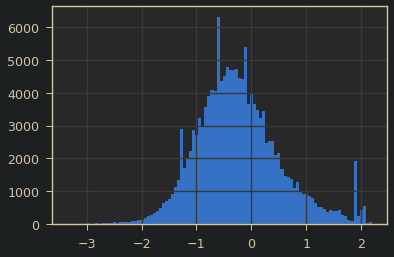

In [4]:
# plt.hist(scores, bins=100)
_=plt.hist((1/scores)-1, bins=100)

In [ ]:
(scores < 100).sum()/scores.shape[0]

_= plt.hist(scores[(scores > -1) & (scores < 1)])

<AxesSubplot:xlabel='score', ylabel='Count'>

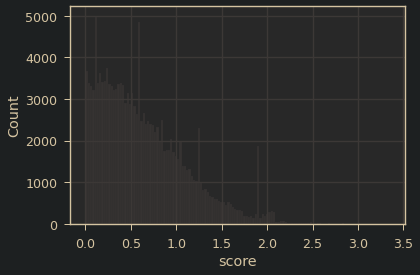

In [8]:
unnormed = (1/scores)-1

sns.histplot(unnormed.abs())

/tmp/ipykernel_27844/593798169.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/np.log(np.linspace(0., 10000., 1000)+1))


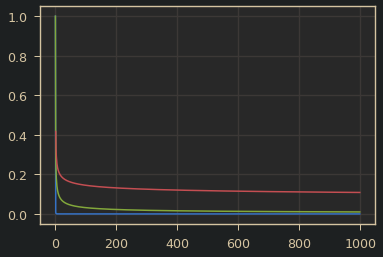

In [28]:
plt.plot(1/(np.linspace(0., 10000., 1000)+1)**2)
plt.plot(1/(np.linspace(0., 10000., 1000)+1)**0.5)

plt.plot(1/np.log(np.linspace(0., 10000., 1000)+1))
# plt.plot(np.linspace(0., 1000., 1000)/(np.linspace(0., 1000., 1000).sum()))

# plt.ylim((0, 1))

(array([  343.,  6754., 13915., 19935., 21857., 22554., 18717., 16226.,
        15004., 11389.]),
 array([0.22985832, 0.30687236, 0.38388641, 0.46090045, 0.53791449,
        0.61492853, 0.69194257, 0.76895661, 0.84597065, 0.92298469,
        0.99999873]),
 <BarContainer object of 10 artists>)

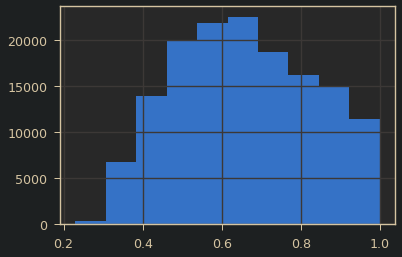

In [7]:
plt.hist(1/(unnormed.abs()+1))

In [ ]:
z = (unnormed - unnormed.mean())/(unnormed.var()**0.5)

sns.histplot(z)

In [ ]:
# unnormed = scores

def norm(v):
    return (v - v.min())/(v.max() - v.min())

normed = np.log(norm(norm(unnormed))+1)

sns.histplot(normed)

In [43]:
def norm(v, q=99.5): # (empirically) leads to 1% of the data being outside the range
    return (v - np.percentile(v, 100-q))/(np.percentile(v, q) - np.percentile(v, 100-q))


re_normed = norm(unnormed)

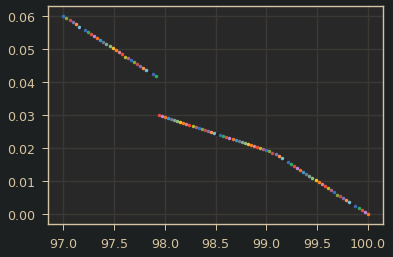

In [52]:
for p in np.linspace(97, 99.999, 100):
    re_normed = norm(unnormed, p)
    out = ((re_normed < 0.) | (re_normed > 1.0)).sum()/re_normed.shape[0]
    plt.plot([p], [out], ".")

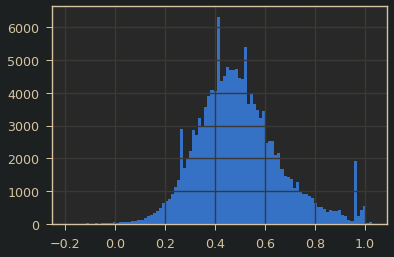

In [44]:
_=plt.hist(re_normed, bins=100)

(array([57.,  7.,  3.,  4.,  5.,  5.,  8., 18., 14., 26.]),
 array([1.00003094, 1.00276819, 1.00550543, 1.00824267, 1.01097992,
        1.01371716, 1.0164544 , 1.01919165, 1.02192889, 1.02466613,
        1.02740338]),
 <BarContainer object of 10 artists>)

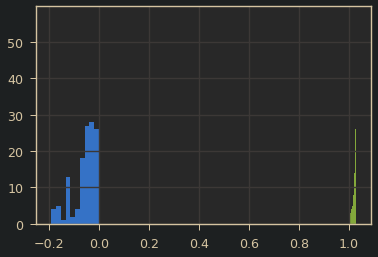

In [46]:
plt.hist(re_normed[(re_normed < 0)])
re_normed[(re_normed > 1.0)]

In [ ]:
for q in np.linspace(0., 1., 30):
    print(q, np.percentile(unnormed, q))

In [ ]:
v = np.random.uniform(0., 100, size=100000)

for q in np.linspace(0., 100., 30):
    print(q, np.percentile(v, q))